In [1]:
import pandas as pd

## import safepy package
from safepy import safe
%matplotlib inline

In [2]:
## Parameters
path_to_safe_data='../../safe-data/' #path to the cloned safe-data repository (https://github.com/baryshnikova-lab/safe-data.git)

# Example 3 -- Annotating a Scatter plot

In this example, SAFE is run on a scatter plot (e.g., a UMAP projection of a high-dimensional dataset). A scatter plot can be thought of as a fully connected network. Node neighborhoods are defined using Euclidean distance.

In [3]:
sf = safe.SAFE()

In [4]:
# SAFE recognizes the type of input file from the file extension. So, ".scatter" here indicates that the input file contains 
# a list of nodes with coordinates (instead of a list of node pairs, as is the case in proper networks)
sf.load_network(network_file='networks/YeastPhenome_UMAP_1586.scatter', 
                node_key_attribute='key')

Loading the file of node coordinates...


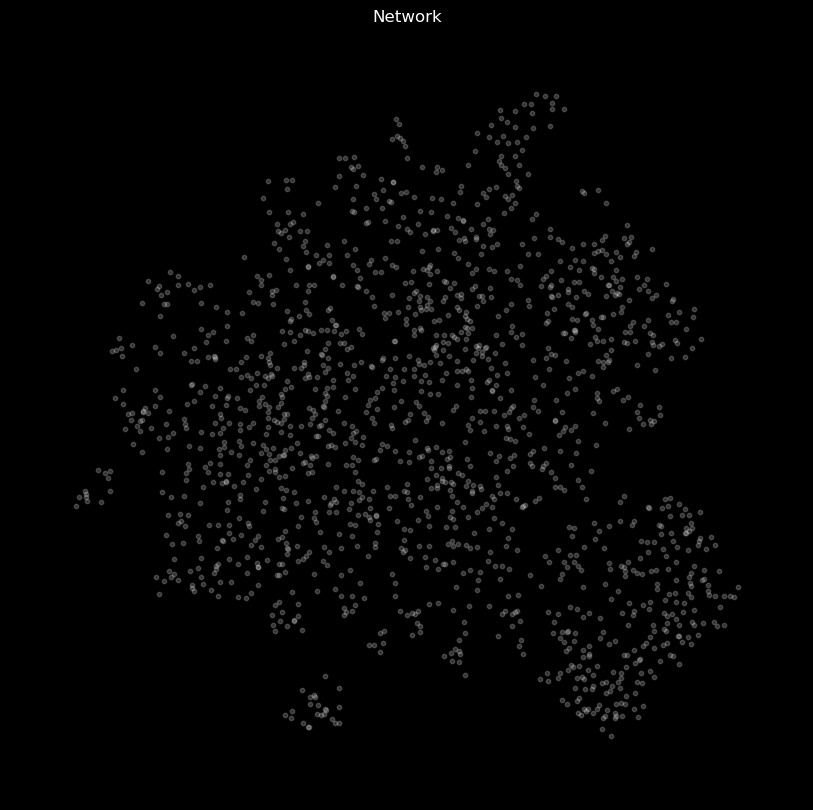

In [5]:
sf.plot_network()

In [6]:
sf.define_neighborhoods(node_distance_metric='euclidean', neighborhood_radius=0.06)

In [9]:
att = pd.read_csv(f'{sf.path_to_safe_data}/attributes/YeastPhenome_screen158_NPVs.txt', sep='\t')

In [10]:
att.set_index('Gene systematic name', inplace=True)
att = att[['NPV hap alpha | growth (spot assay) | standard | YPG [3%] | Merz S~Westermann B, 2009']]

In [11]:
# The load_attribute function expects a file (or a Pandas dataframe) where the first column/index is the node label 
# (that should match the node labels in the network) and the other columns are attributes.
sf.load_attributes(attribute_file=att)

In [12]:
sf.compute_pvalues(num_permutations=10000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:25<00:00, 390.65it/s]


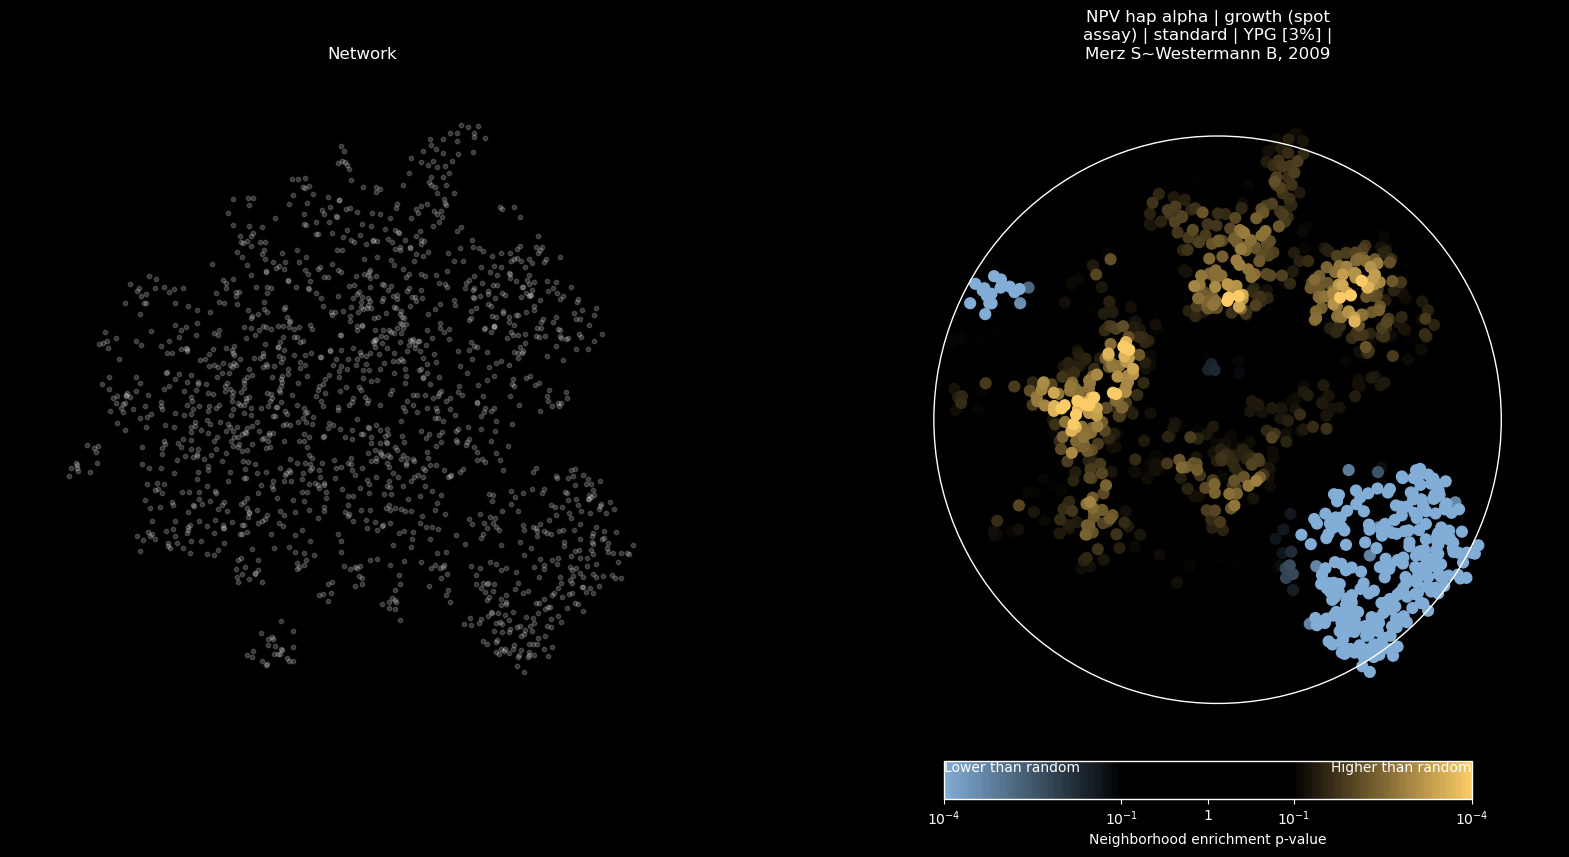

In [13]:
# Plot a random attribute
sf.plot_sample_attributes()

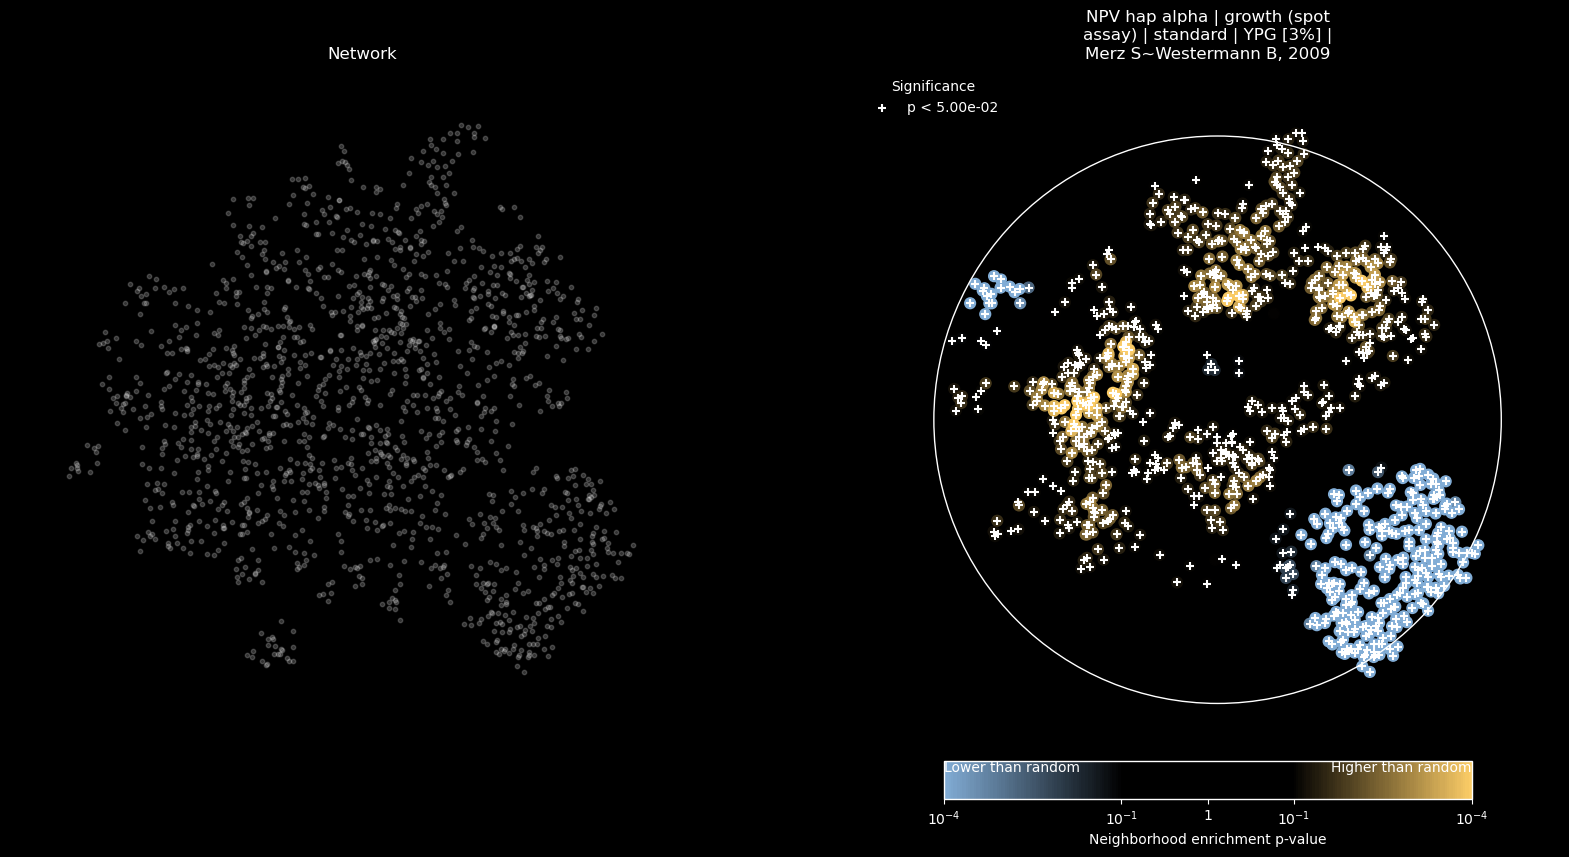

In [14]:
# Map the significant nodes
sf.plot_sample_attributes(show_significant_nodes=True)

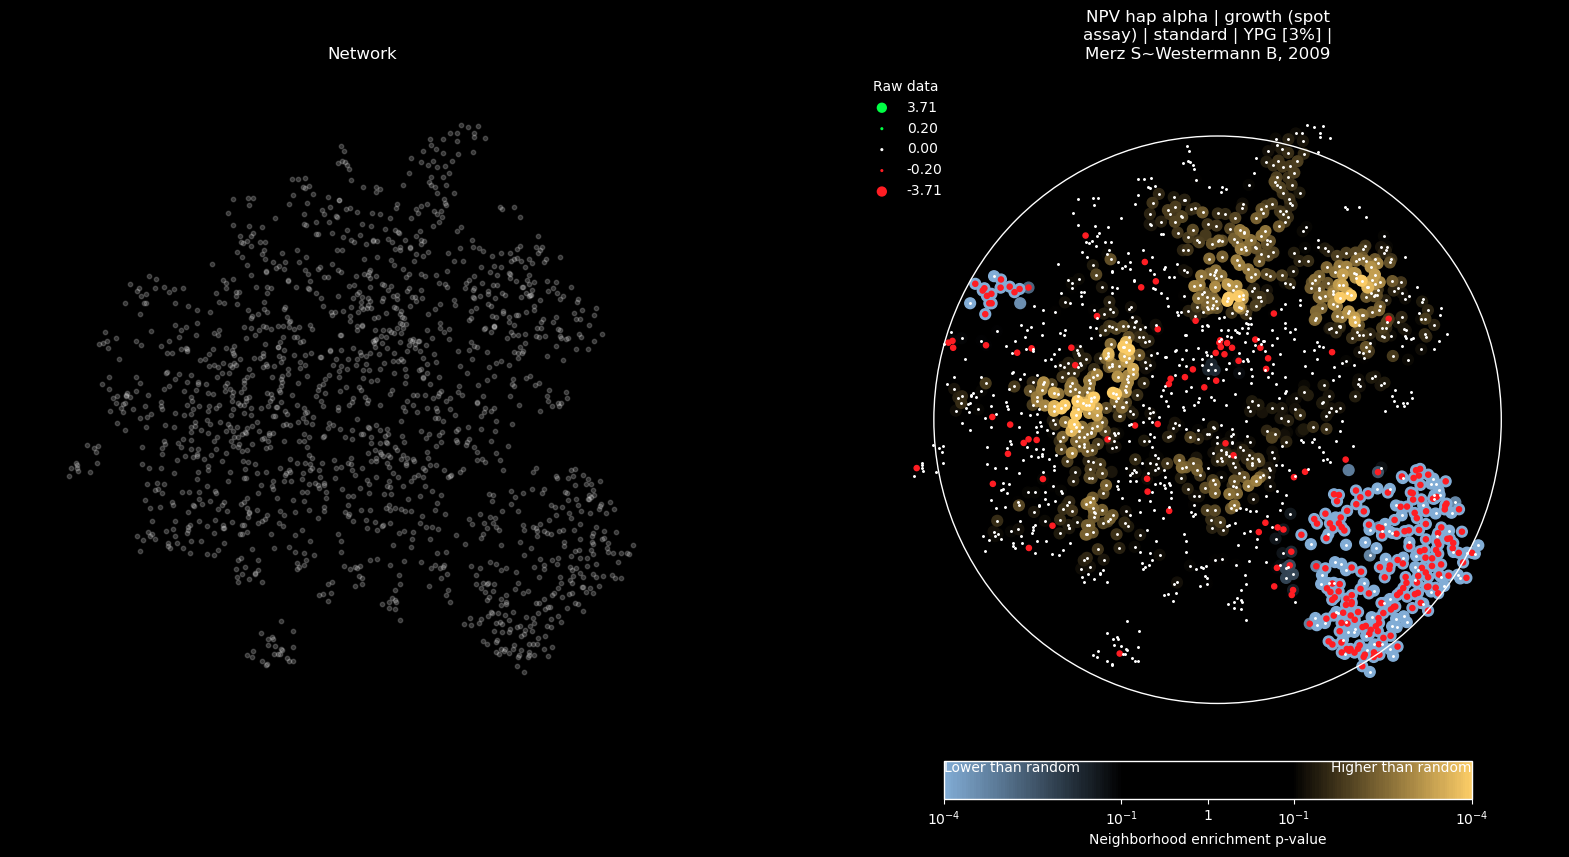

In [15]:
# Map the raw data onto the network
sf.plot_sample_attributes(show_raw_data=True)

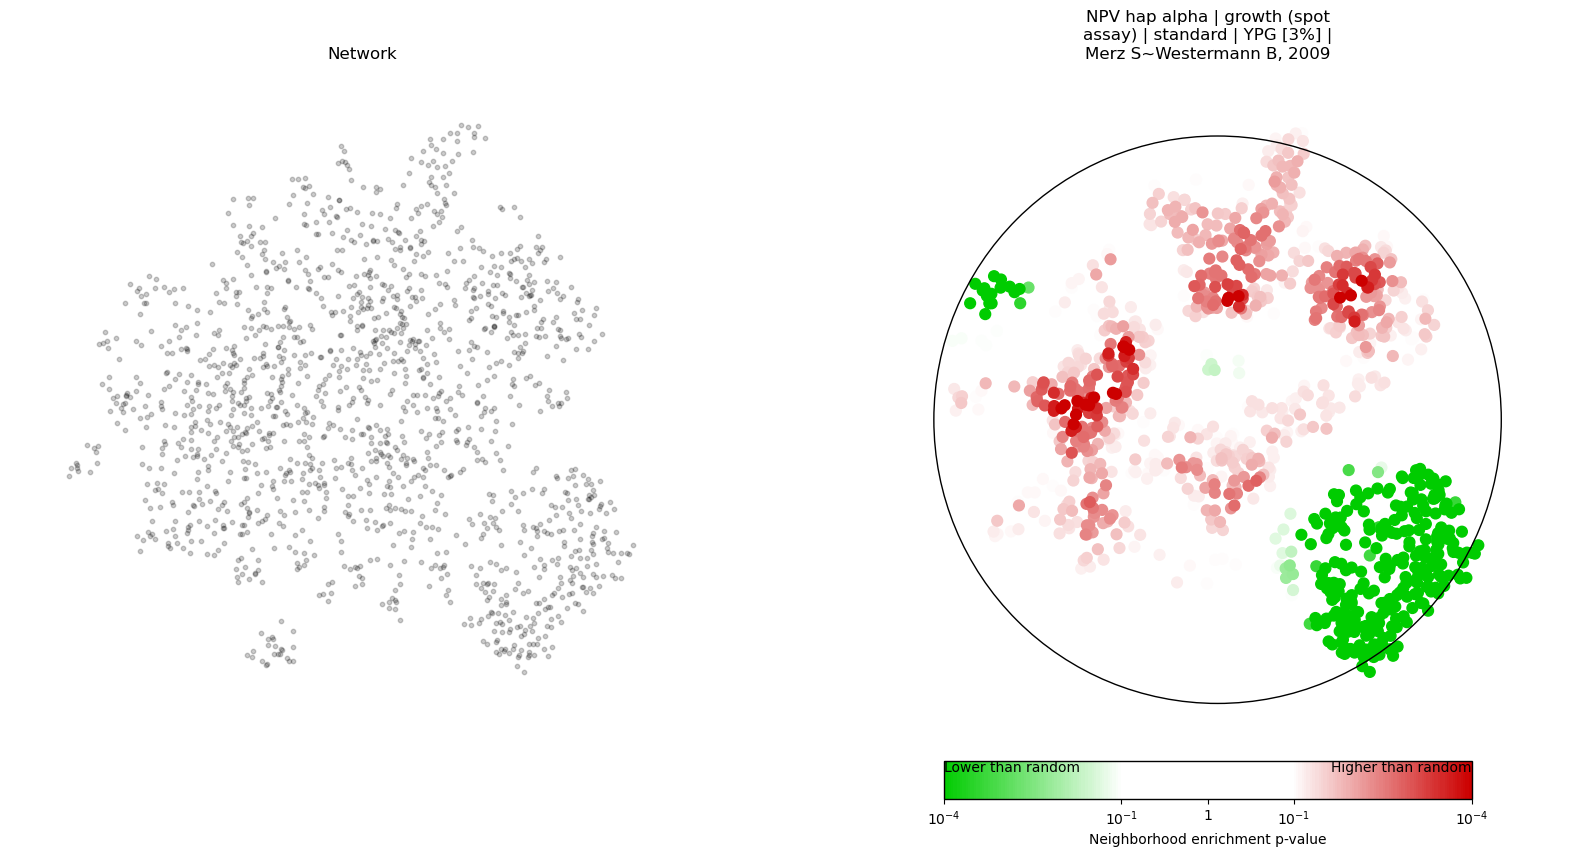

In [16]:
# Change the background color and the enrichment colors
sf.plot_sample_attributes(background_color='#ffffff', colors=['00cc00','cc0000'])

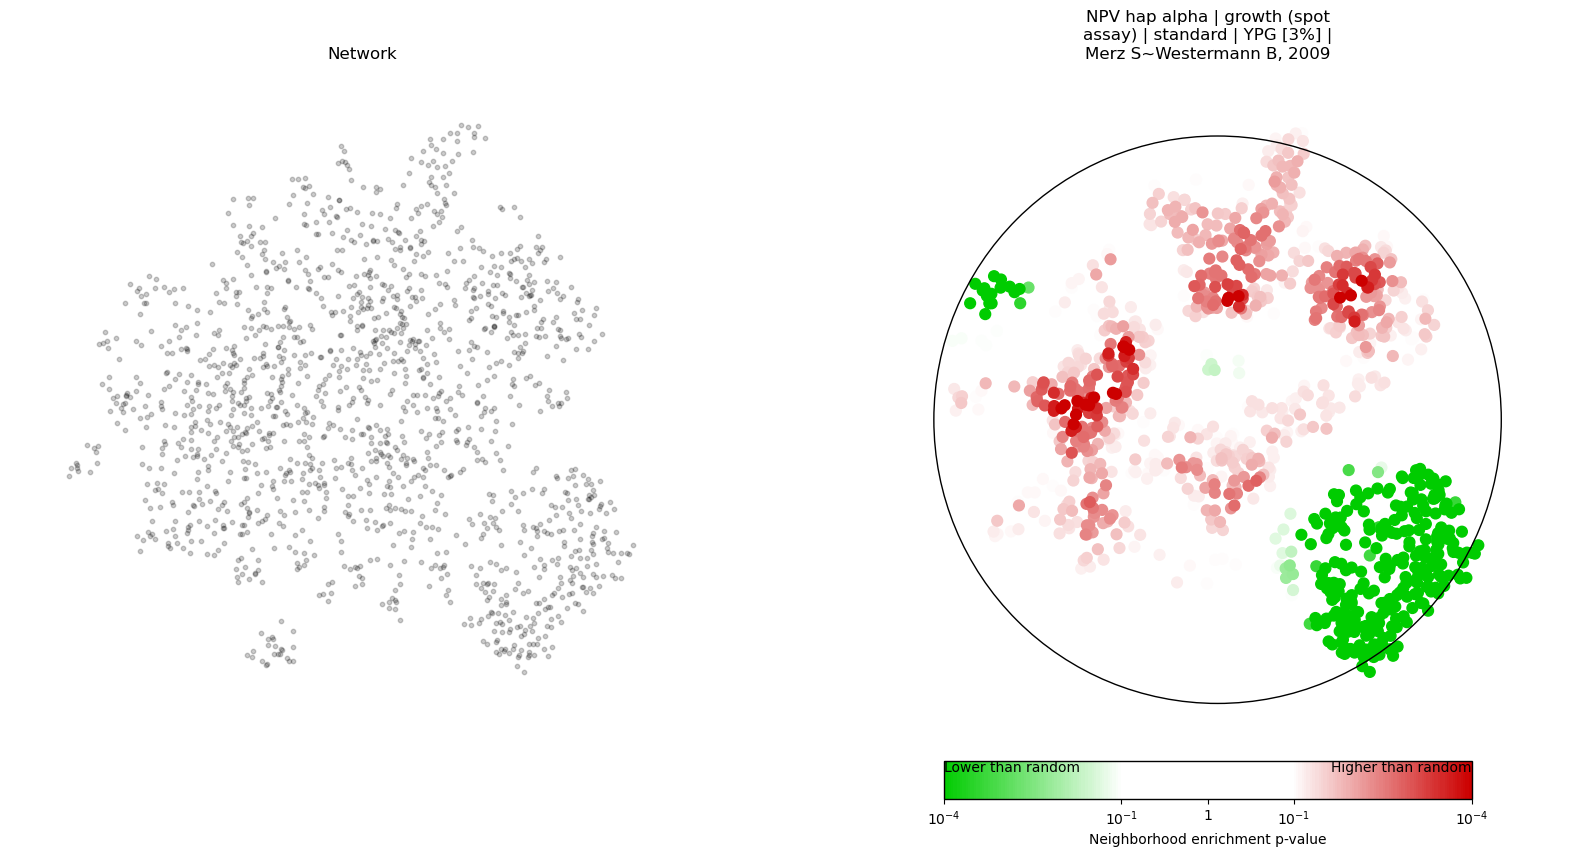

In [17]:
# Change the background color and the enrichment colors
sf.plot_sample_attributes(background_color='#ffffff', colors=['00cc00','cc0000'], save_fig='merz_westermann.pdf')

In [18]:
# Print output files into the current directory
sf.print_output_files(output_dir='./')